In [28]:
#This code is Decision tree-Classification model
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [3]:
from sklearn.datasets import load_iris

In [4]:
ds=load_iris()

In [5]:
print(ds.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [6]:
#ds is dataset
ds.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [7]:
import seaborn as sns
df=sns.load_dataset('iris')


In [8]:
#Independent and Dependent features from dataset(ds) and dataframe from sns(df) 
x=df.iloc[:,:-1]
y=ds.target

In [18]:
#Split the data to Training And Test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=42)


In [19]:
#Create Decision Tree model importing the Classifier
from sklearn.tree import DecisionTreeClassifier
classifier=DecisionTreeClassifier()


In [20]:
classifier.fit(X_train,y_train)

DecisionTreeClassifier()

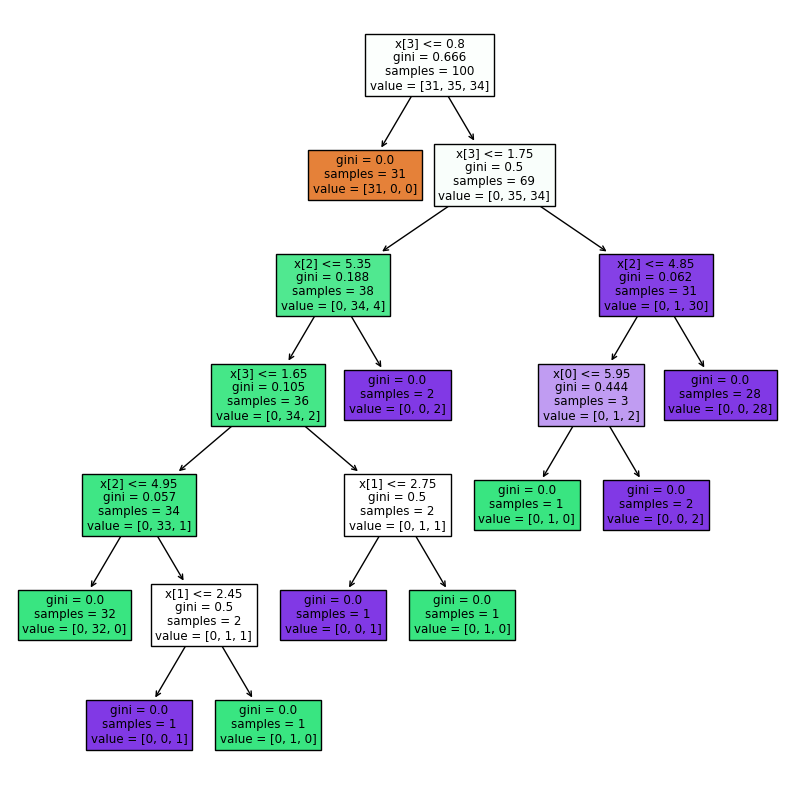

In [30]:
#Display the Decison tree
from sklearn import tree

plt.figure(figsize=(10,10))
tree.plot_tree(classifier,filled=True)
plt.show()

In [31]:
#Post Pruning
classifier=DecisionTreeClassifier(criterion='entropy',max_depth=2)


In [32]:
classifier.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=2)

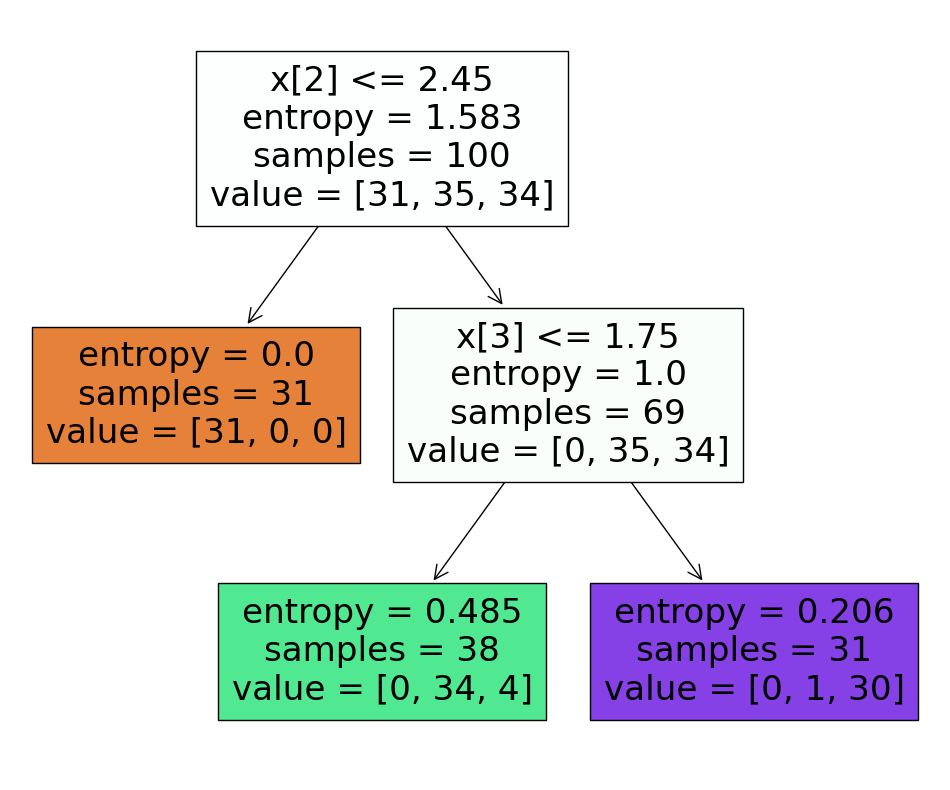

In [33]:
#Plot the Decison tree after Pruning
from sklearn import tree
plt.figure(figsize=(12,10))
tree.plot_tree(classifier,filled=True)
plt.show()

In [36]:
#Prediction
y_pred=classifier.predict(X_test)

In [39]:
#Compute Accuracy_score,classiifcation_report
from sklearn.metrics import accuracy_score,classification_report
accuracy_score=accuracy_score(y_test,y_pred)
classification_report=classification_report(y_test,y_pred)

In [40]:
accuracy_score

0.98

In [41]:
classification_report

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00        19\n           1       0.94      1.00      0.97        15\n           2       1.00      0.94      0.97        16\n\n    accuracy                           0.98        50\n   macro avg       0.98      0.98      0.98        50\nweighted avg       0.98      0.98      0.98        50\n'

In [42]:
#Prepruning and Hyperparameter tuning
parameters={'criterion':['gini','entropy','log_loss'],
            'splitter':['best','random'],
            'max_depth':[1,2,3,4,5],
            'max_features':['auto','sqrt','log2']
}

In [44]:
from sklearn.model_selection import GridSearchCV
Gridclassifier=GridSearchCV(classifier,param_grid=parameters,cv=2,scoring='accuracy')

In [46]:
import warnings
warnings.filterwarnings('ignore')
Gridclassifier.fit(X_train,y_train)


GridSearchCV(cv=2,
             estimator=DecisionTreeClassifier(criterion='entropy', max_depth=2),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [47]:
Gridclassifier.best_params_

{'criterion': 'log_loss',
 'max_depth': 5,
 'max_features': 'sqrt',
 'splitter': 'random'}

In [48]:
#Predit using Gridsearchcv
Gridclassifier.predict(X_test)

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0, 1, 2, 2, 1, 2])

In [50]:
#Accuracy and Performace
from sklearn.metrics import accuracy_score,classification_report
accuracy=accuracy_score(y_test,y_pred)
classiifcation_report=classification_report(y_test,y_pred)

In [51]:
accuracy

0.98

In [52]:
classiifcation_report

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00        19\n           1       0.94      1.00      0.97        15\n           2       1.00      0.94      0.97        16\n\n    accuracy                           0.98        50\n   macro avg       0.98      0.98      0.98        50\nweighted avg       0.98      0.98      0.98        50\n'